In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.5.1"

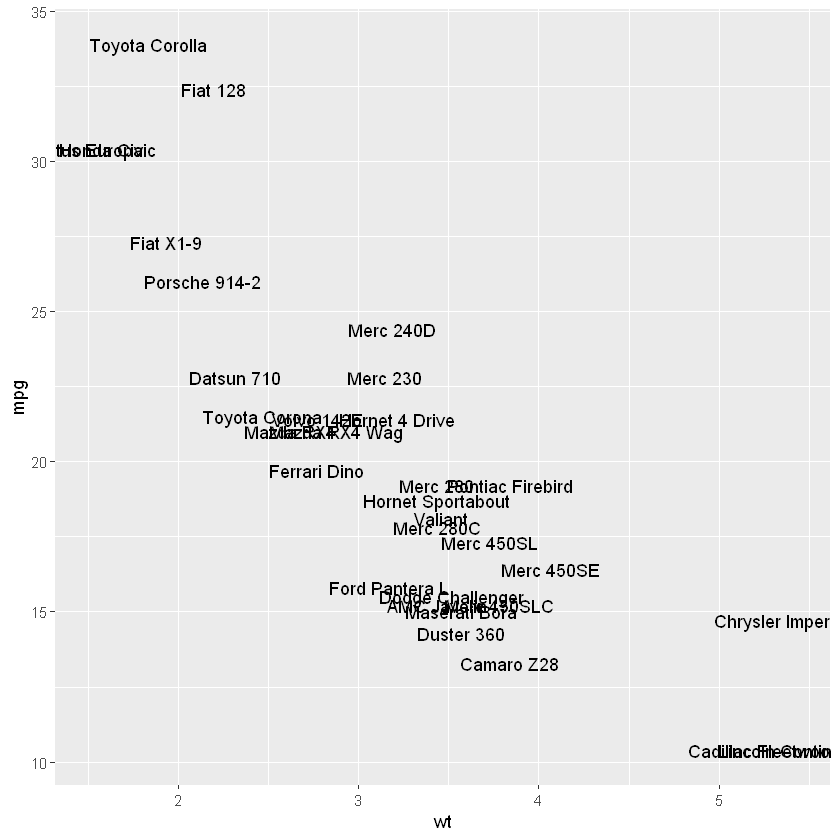

In [2]:
p <- ggplot(mtcars, aes(wt, mpg, label = rownames(mtcars)))

p + geom_text()

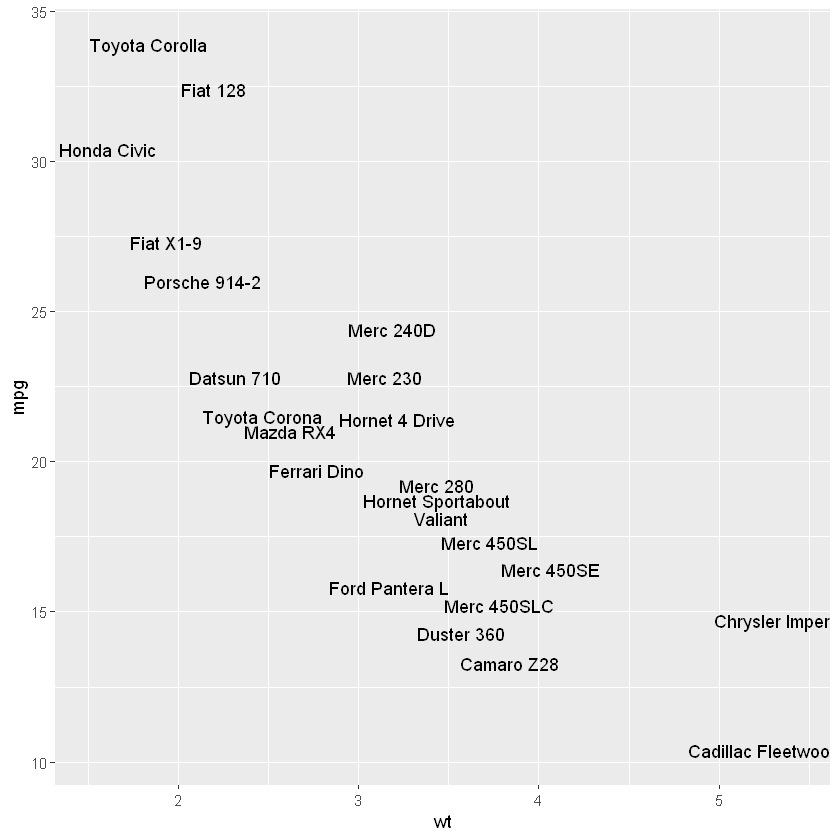

In [3]:
# Avoid overlaps

p + geom_text(check_overlap = TRUE)

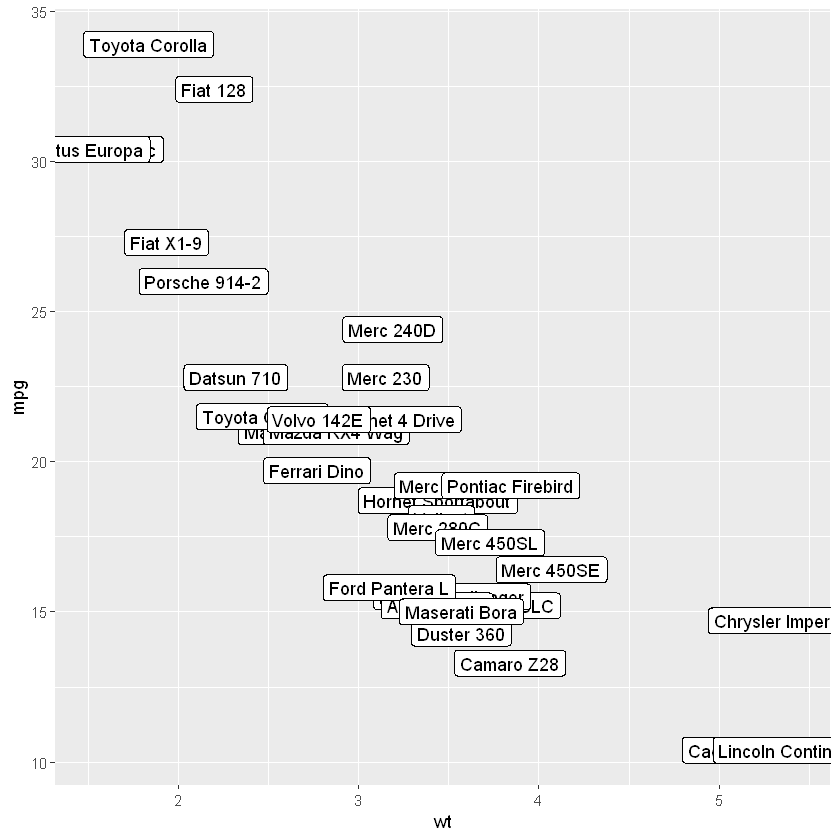

In [4]:
# Labels with background

p + geom_label()

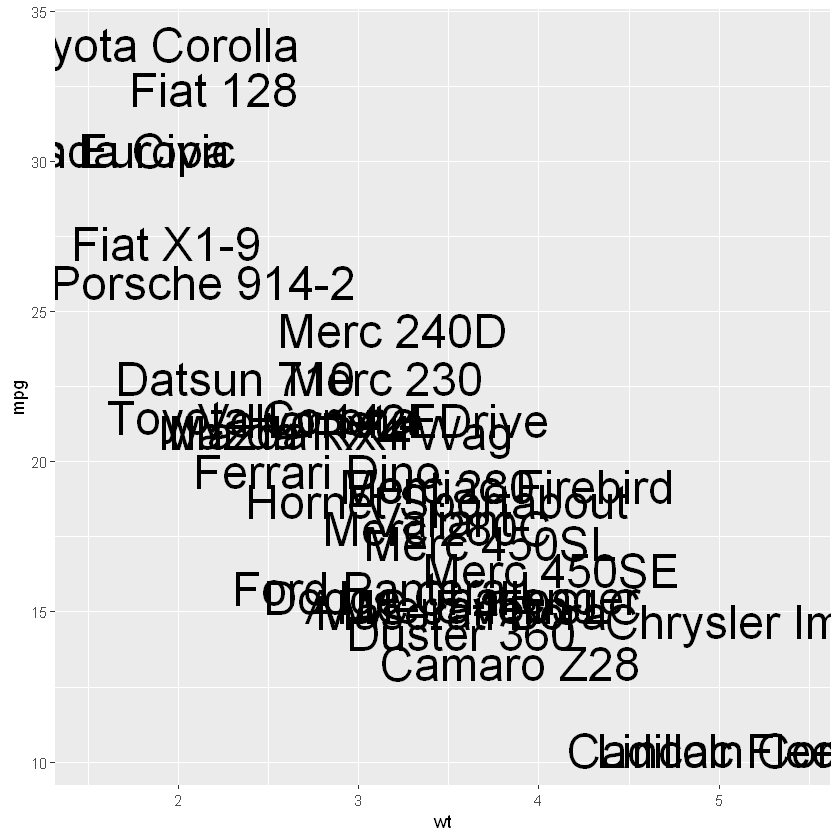

In [5]:
# Change size of the label

p + geom_text(size = 10)

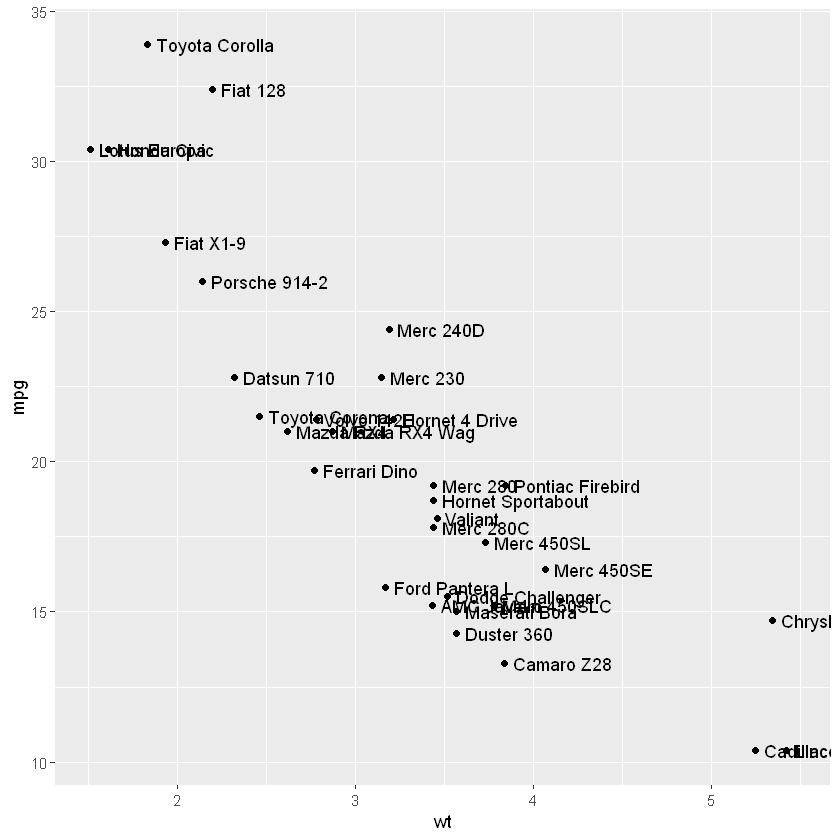

In [6]:
# Set aesthetics to fixed value

p + 
  geom_point() +
  geom_text(hjust = 0, nudge_x = 0.05)

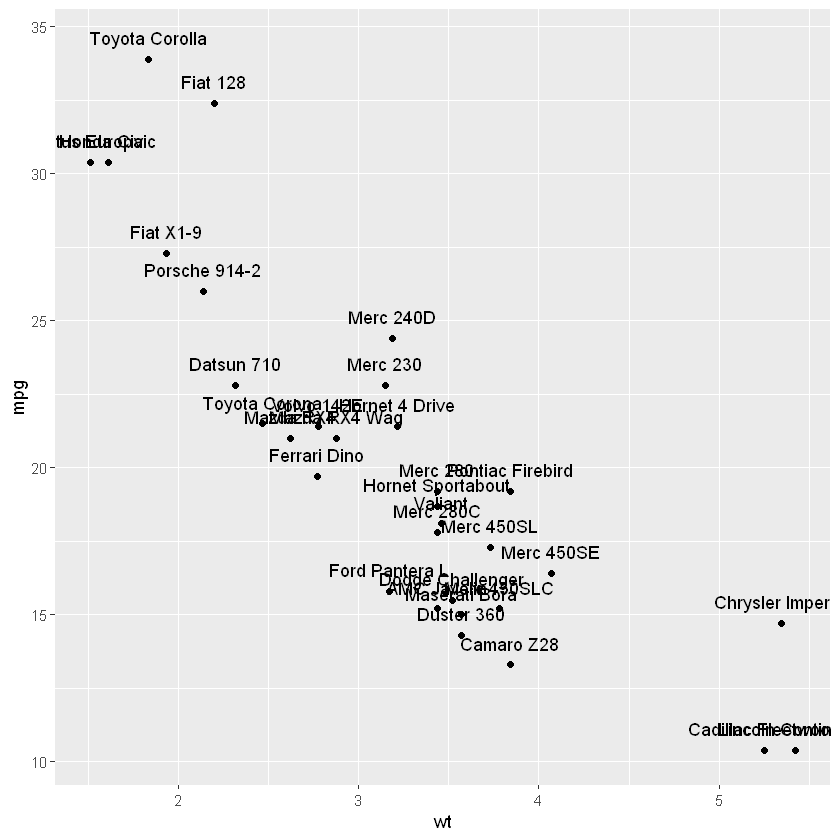

In [7]:
p +
  geom_point() +
  geom_text(vjust = 0, nudge_y = 0.5)

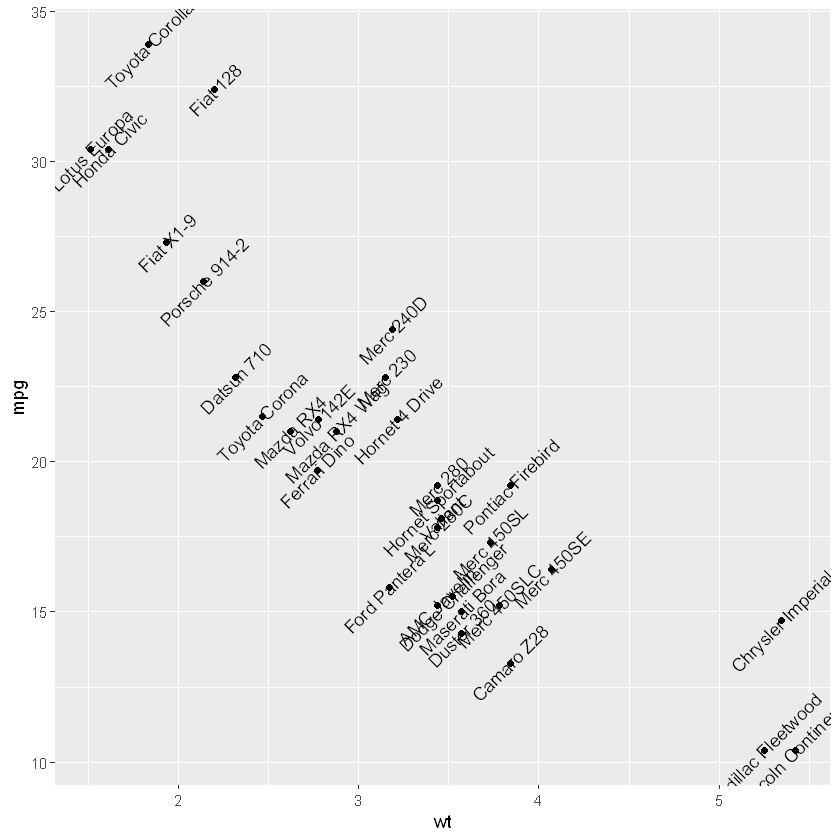

In [8]:
p + 
  geom_point() +
  geom_text(angle = 45)

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"

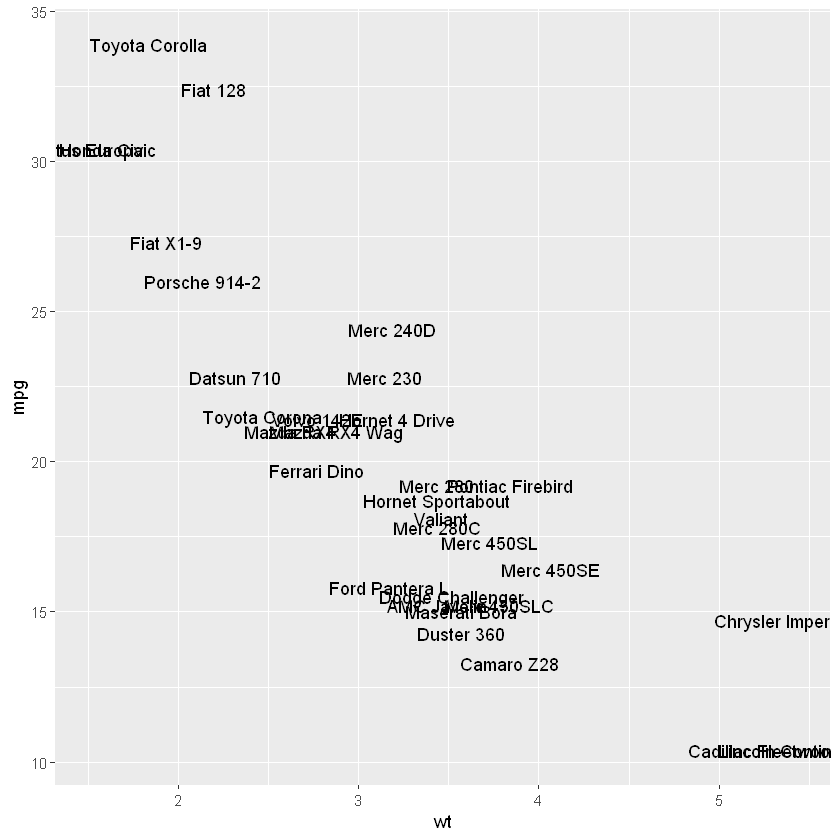

In [9]:
# Code below doesn't work on all systems

p + geom_text(family = "Times New Roman")

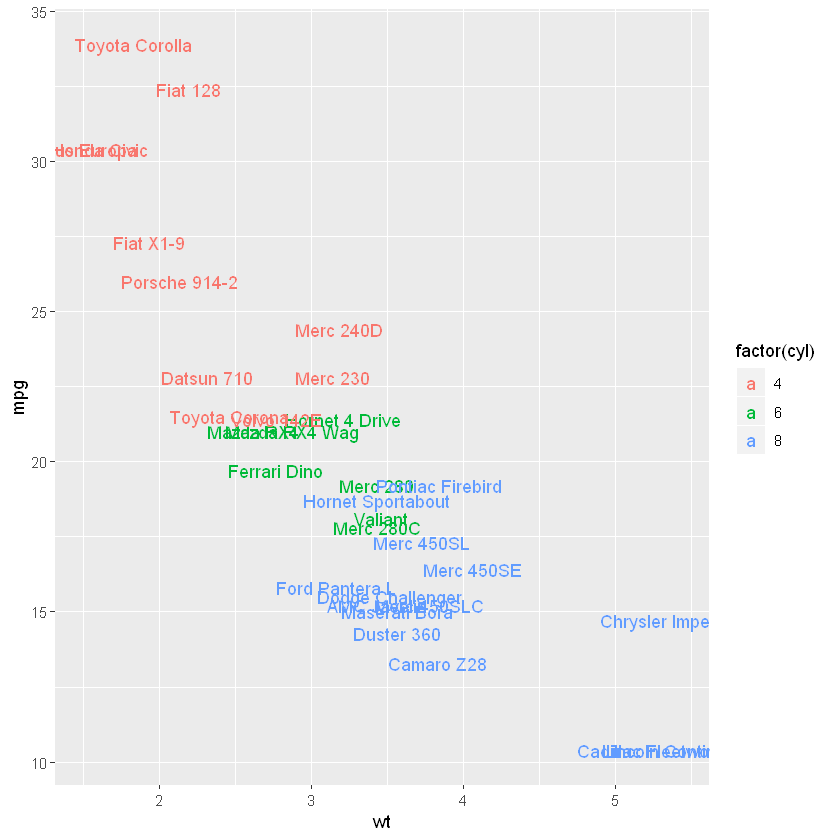

In [10]:
# Adding aesthetic mappings

p + geom_text(aes(colour = factor(cyl)))

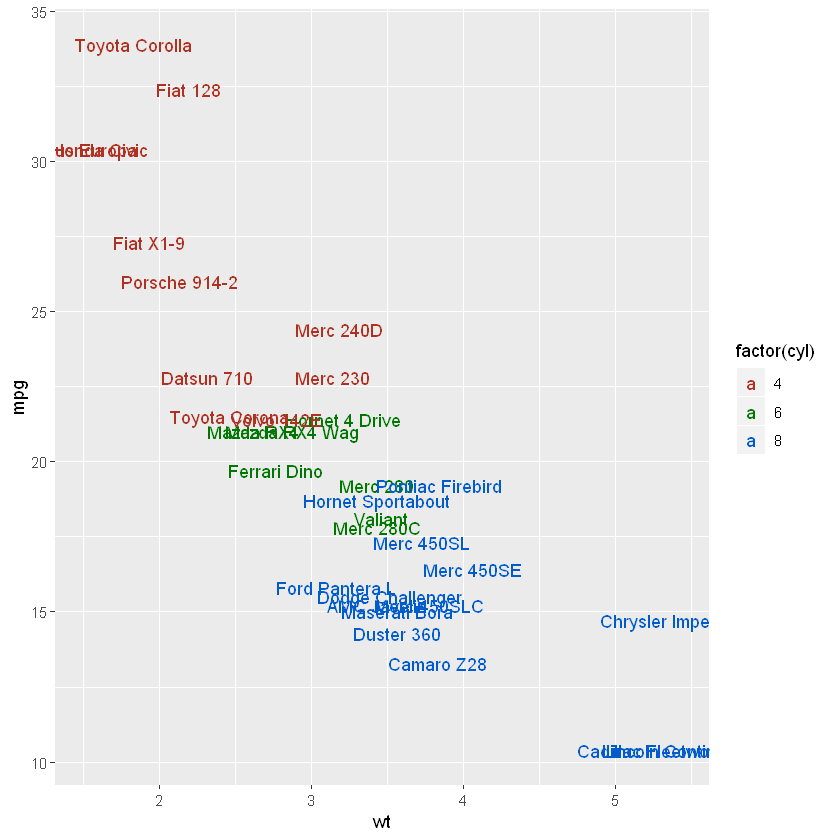

In [11]:
p + 
  geom_text(aes(colour = factor(cyl))) +
  scale_colour_discrete(l = 40)

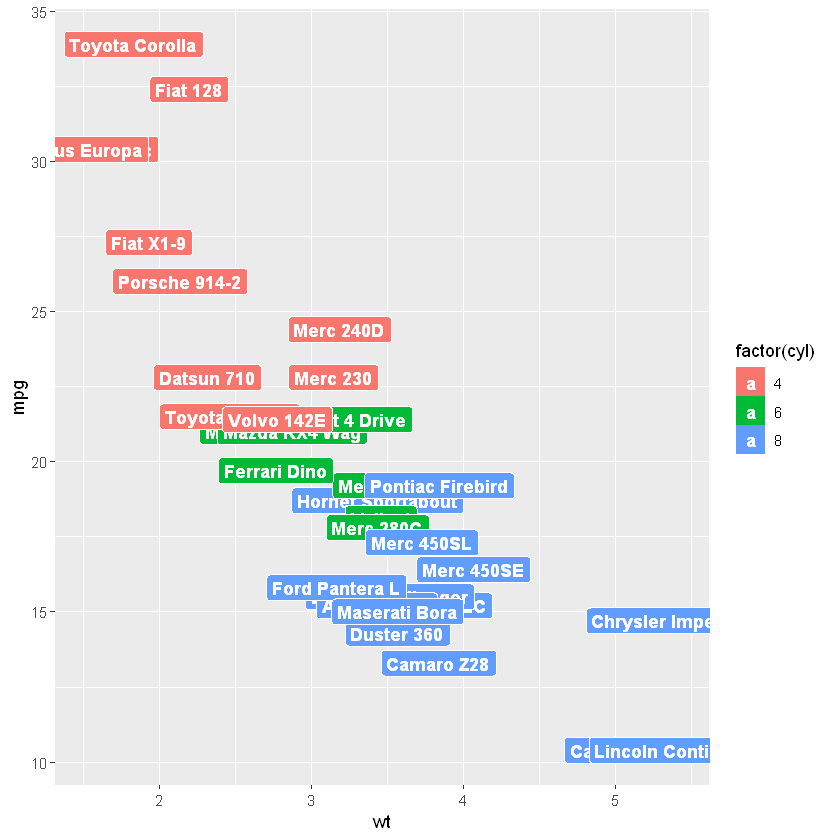

In [12]:
p +
  geom_label(aes(fill = factor(cyl)), colour = "white",
             fontface = "bold")

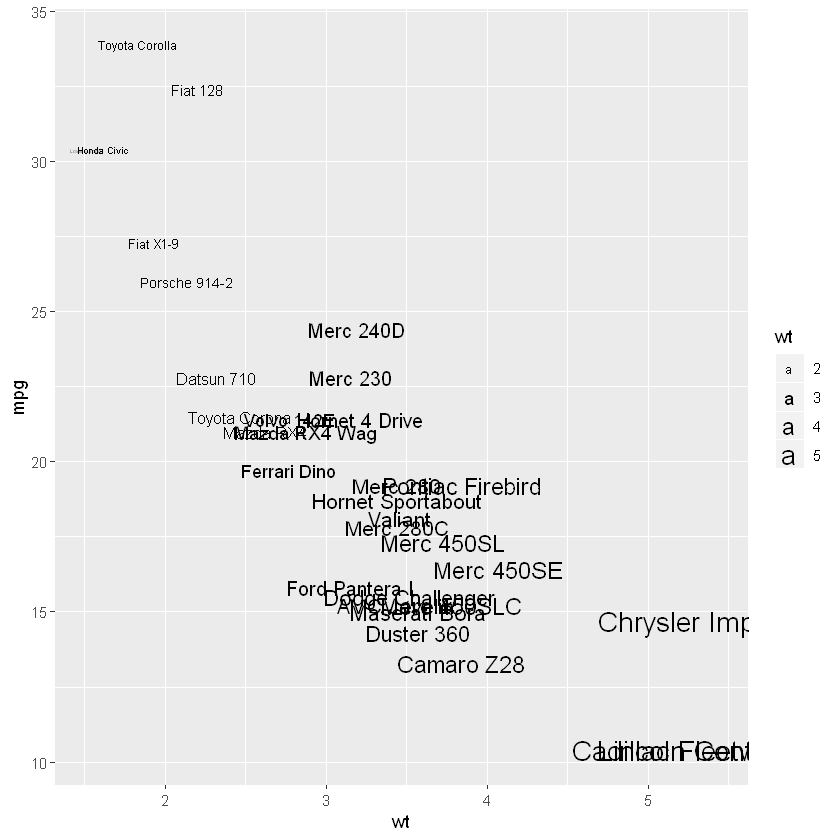

In [13]:
p +
  geom_text(aes(size = wt))

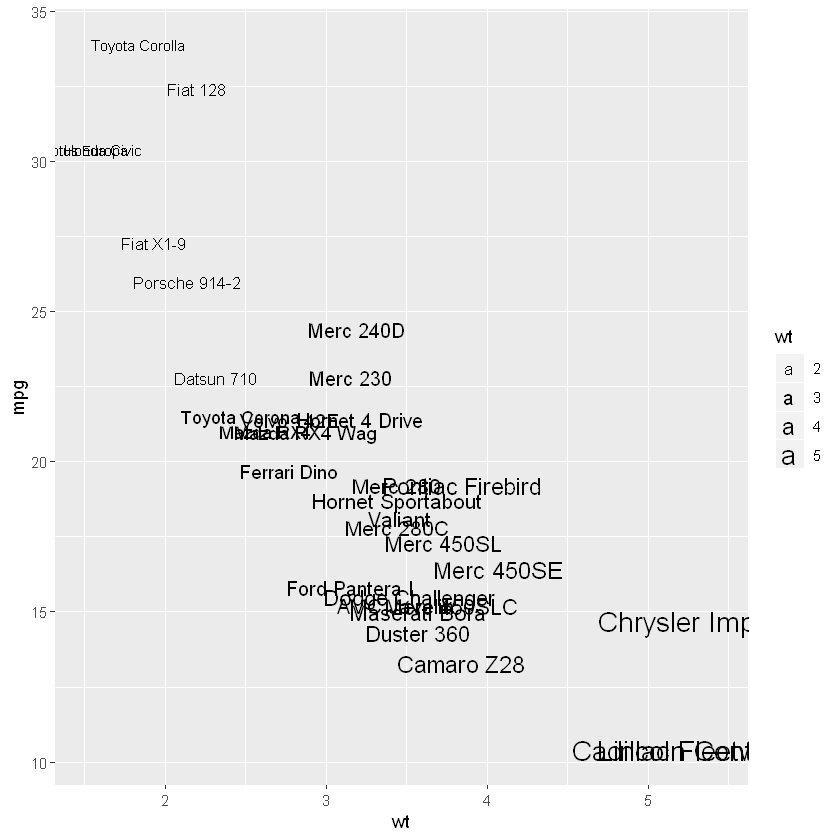

In [14]:
# Scale height of text, rather than sqrt(height)

p +
  geom_text(aes(size = wt)) +
  scale_radius(range = c(3, 6))

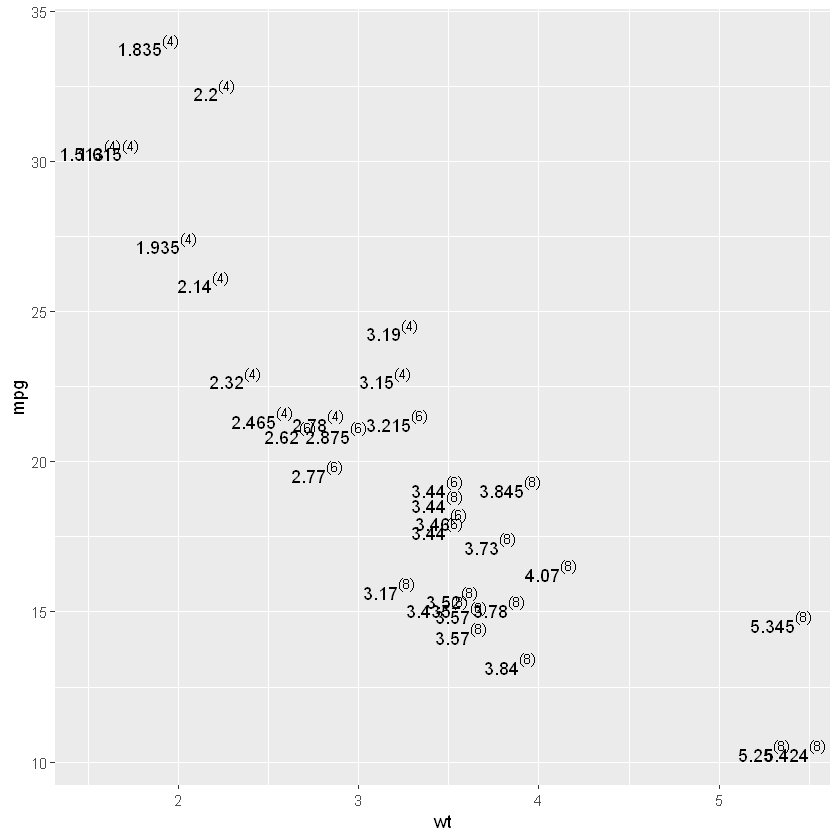

In [15]:
# You can display expressions by setting parse = TRUE. The
# details of the display are described in ?plotmath, but
# note that geom_text() uses strings, not expressions.

p +
  geom_text(aes(label = paste(wt, "^(", cyl, ")", sep = "")),
            parse = TRUE)

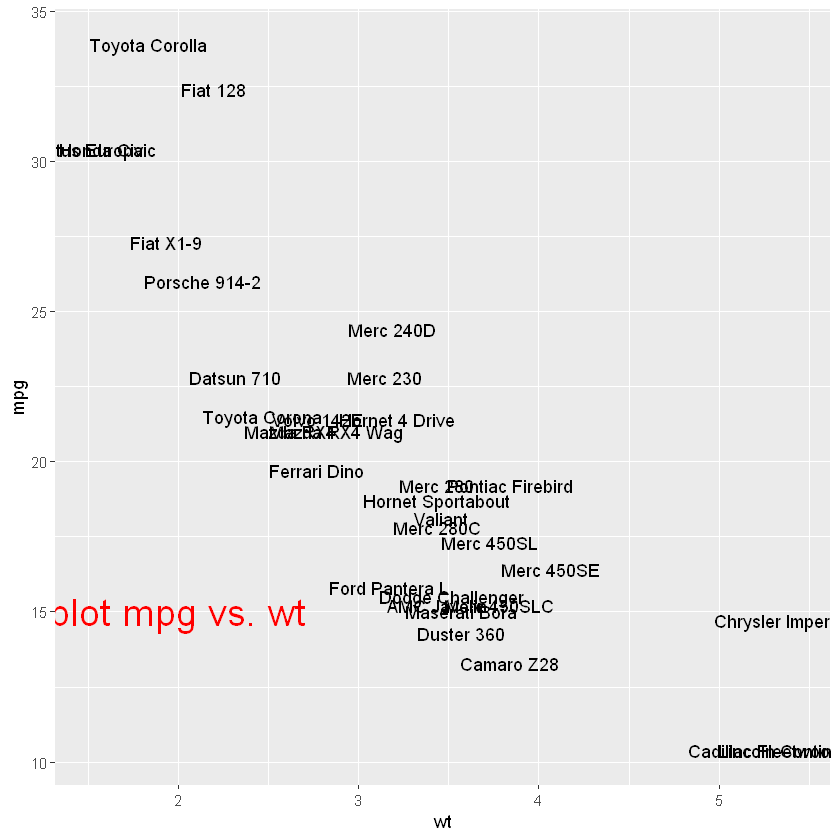

In [16]:
# Adding a text annotation

p + 
  geom_text() +
  annotate("text", label = "plot mpg vs. wt",
           x = 2, y = 15, size = 8, colour = "red")

Warning message:
"Width not defined. Set with `position_dodge(width = ?)`"

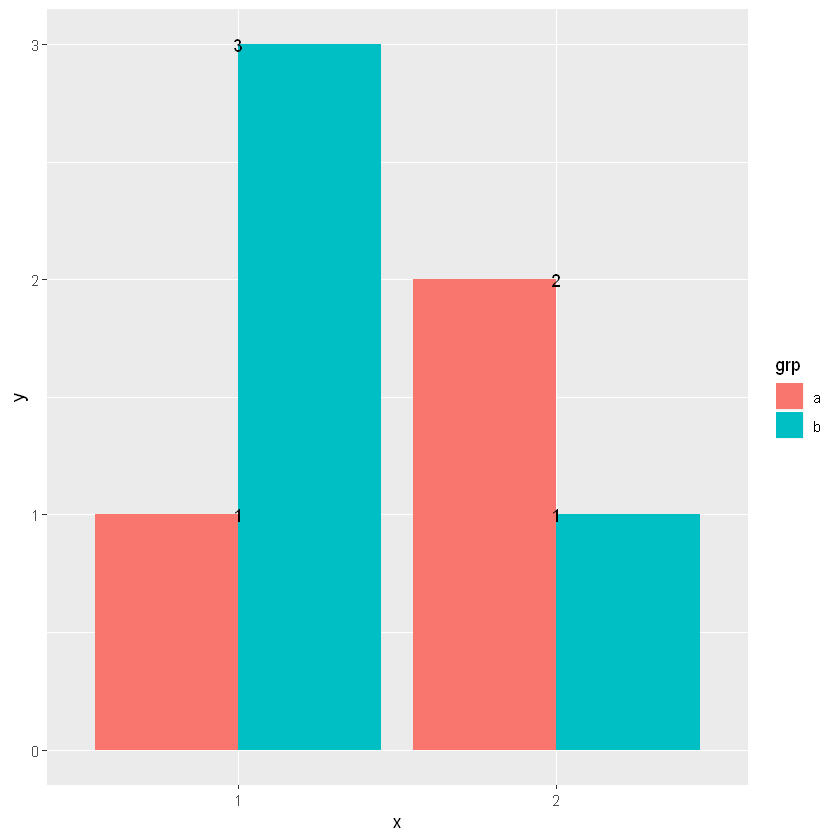

In [17]:
# Aligning labels and bars ------------------------------------

df <- data.frame(
  x = factor(c(1, 1, 2, 2)),
  y = c(1, 3, 2, 1),
  grp = c("a", "b", "a", "b")
)

# ggplot2 doesn't know you want to give the labels the same
# virtual width as the bars:

ggplot(data = df, aes(x, y, group = grp)) +
  geom_col(aes(fill = grp), position = "dodge") +
  geom_text(aes(label = y), position = "dodge")

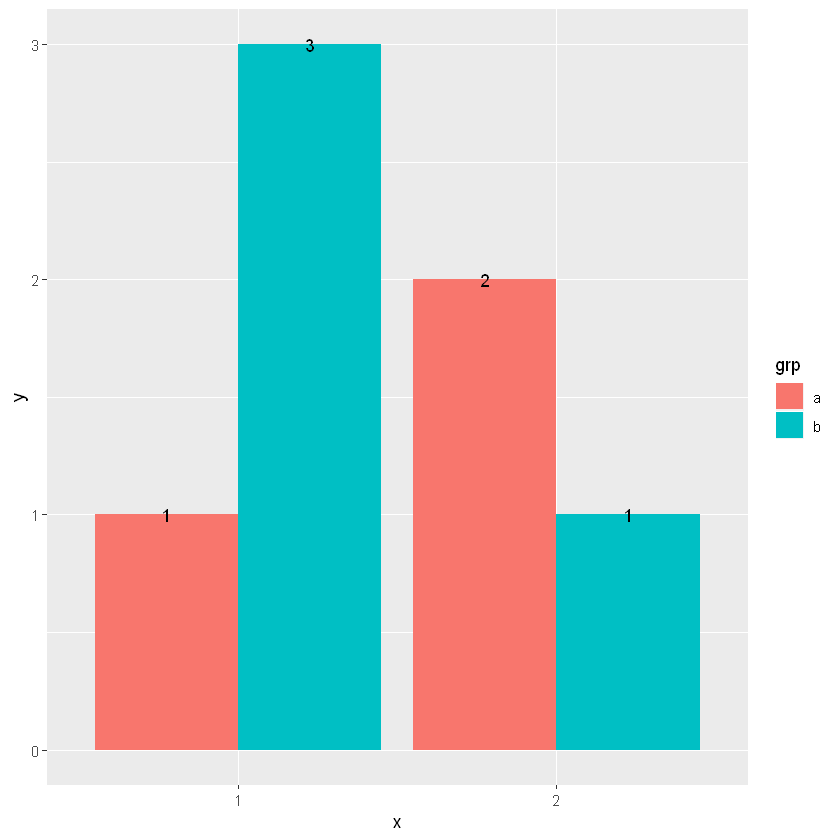

In [18]:
# So tell it:

ggplot(data = df, aes(x, y, group = grp)) +
  geom_col(aes(fill = grp), position = "dodge") +
  geom_text(aes(label = y), position = position_dodge(0.9))

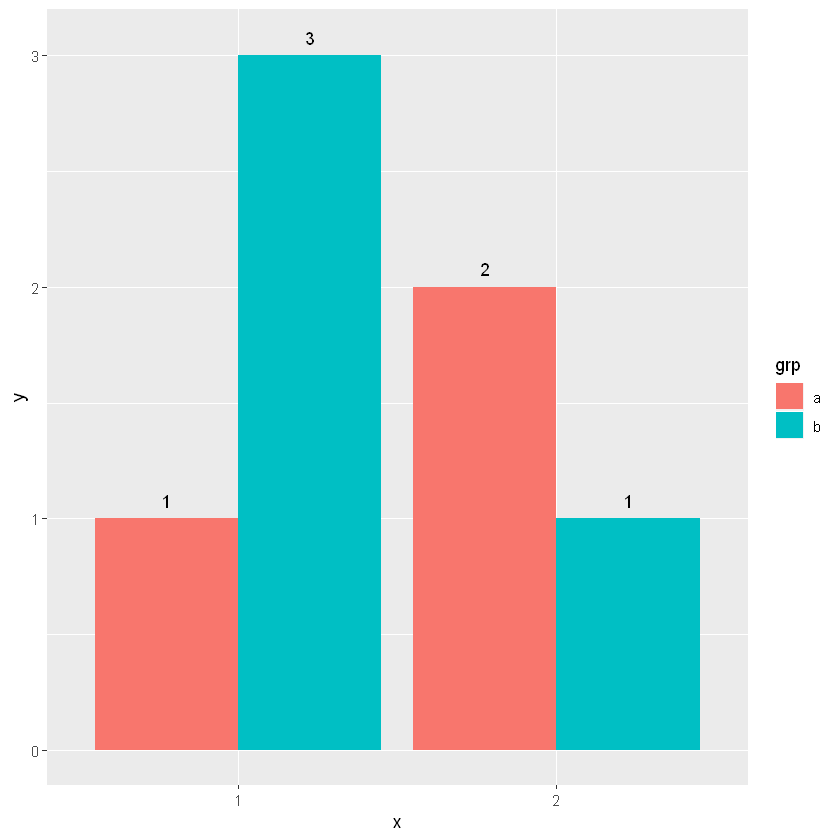

In [19]:
# You can't use nudge and dodge text, so instead adjust
# the y position

ggplot(data = df, aes(x, y, group = grp)) +
  geom_col(aes(fill = grp), position = "dodge") +
  geom_text(
    aes(label = y, y = y + 0.05),
    position = position_dodge(0.9),
    vjust = 0
  )

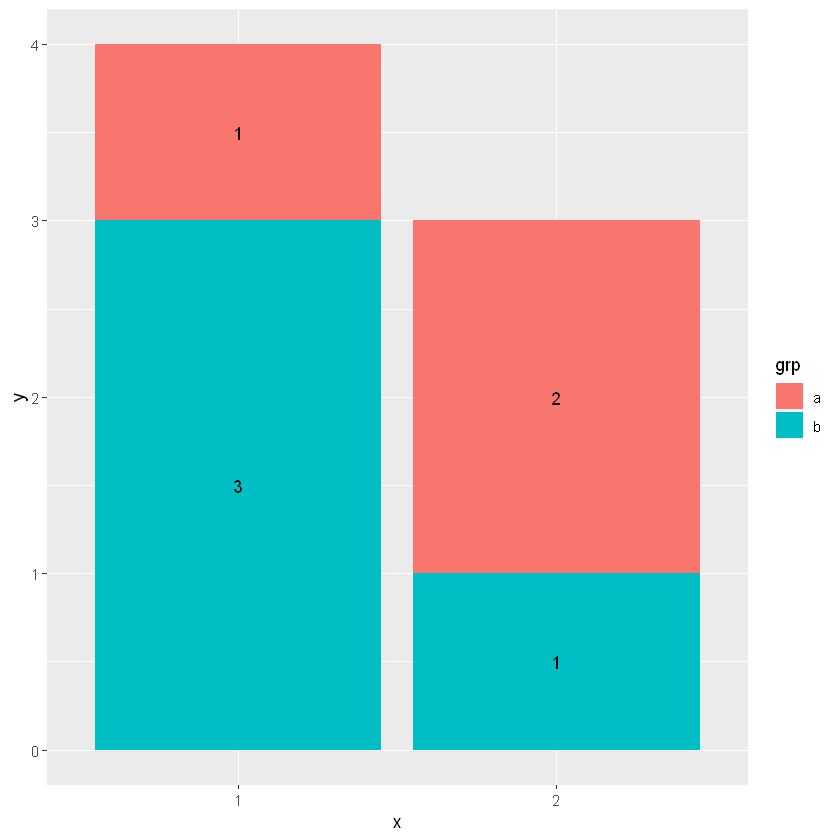

In [20]:
# To place text in the middle of each bar in a stacked
# barplot, you need to set the vjust parameter of
# position_stack()

ggplot(data = df, aes(x, y, group = grp)) +
  geom_col(aes(fill = grp)) +
  geom_text(aes(label = y), position = position_stack(vjust = 0.5))

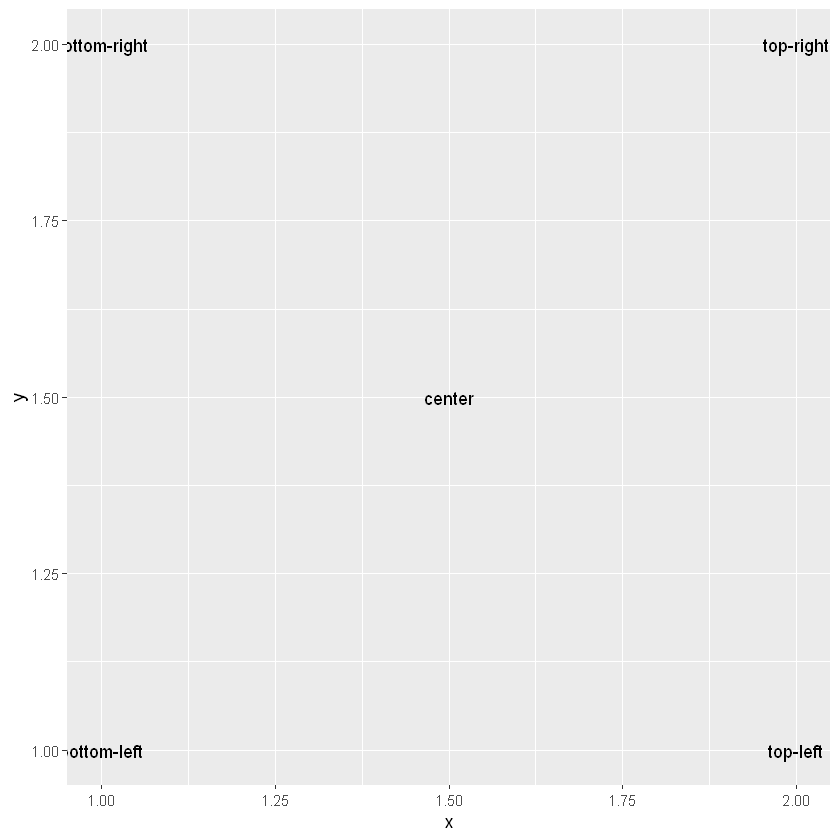

In [21]:
# Justification ------------------------------------------------

df <- data.frame(
  x = c(1, 1, 2, 2, 1.5),
  y = c(1, 2, 1, 2, 1.5),
  text = c("bottom-left", "bottom-right", "top-left",
           "top-right", "center")
)

ggplot(df, aes(x, y)) +
  geom_text(aes(label = text))

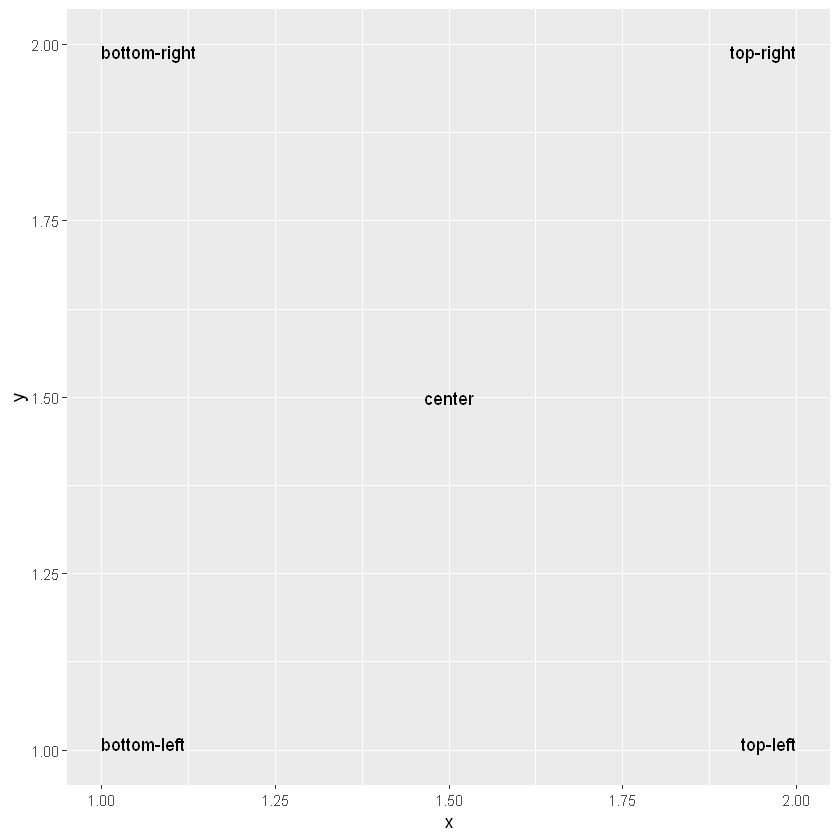

In [22]:
ggplot(df, aes(x, y)) +
  geom_text(aes(label = text), vjust = "inward", 
            hjust = "inward")